
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor:** Diego Ravignani Guerrero
* **JTP:** Ezequiel Enrique Rodriguez

---
---

# Performance de un ajuste

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.optimize import minimize

In [2]:
S0 = 19.1
beta = 2.1
theta = np.array([S0, beta])

In [3]:
xdata = np.array([191, 263, 309])  # distancia en metros

In [4]:
nsimulaciones = 10000

Semilla random para reproducir los resultados

In [5]:
np.random.seed(seed=60870)

In [6]:
def modelo(x, theta):
    S0 = theta[0]
    beta = theta[1]
    x0 = 250
    return S0 * np.power(x/x0, -beta)

In [7]:
mu = modelo(xdata, theta)
mu

array([33.61532498, 17.17118683, 12.24037093])

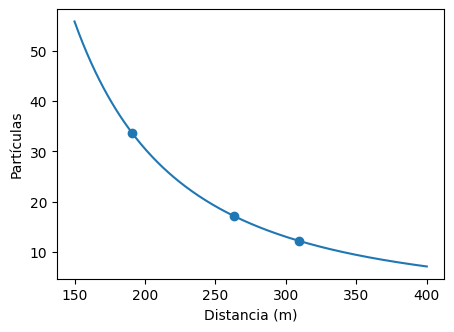

In [8]:
fig = plt.figure(figsize=(5, 3.5)) 
ax = fig.subplots()
ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Partículas')
x = np.linspace(150, 400, 256)
y = modelo(x, theta)
ax.plot(x, y, color='tab:blue', label='$\mu(r)$')
ax.plot(xdata, mu, ls='none', marker='o', color='tab:blue', label='$\mu_i$')
plt.show()

## Función de costo

In [9]:
def funcion_costo(theta, xdata, ydata):
        costo = np.zeros_like(theta[0])
        for (x1, y1) in zip(xdata, ydata):
            mu1 = modelo(x1, theta)
            costo += (mu1-y1) - y1 * np.log(mu1/y1)
        return 2*costo

In [10]:
S0_est = []
beta_est = []
error_S0 = []
error_beta = []
costo_min = []

In [11]:
for i in range(nsimulaciones):
    
    # print(mu)
    ydata = poisson.rvs(mu)
    # print(ydata)
    J = lambda theta: funcion_costo(theta, xdata, ydata) 
    
    res = minimize(J, x0=theta)
    if not res.success:
        print(message)
        exit()
        
    S0_est.append(res.x[0])
    beta_est.append(res.x[1])
    
    cova = 2*res.hess_inv
    errores = np.sqrt( np.diagonal(cova) )
    error_S0.append(errores[0])
    error_beta.append(errores[1])
    
    costo_min.append(res.fun)

## Dibujar la última simulación

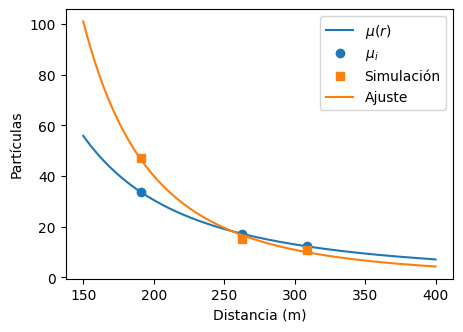

In [12]:
fig = plt.figure(figsize=(5, 3.5)) 
ax = fig.subplots()
ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Partículas')
x = np.linspace(150, 400, 256)
y = modelo(x, theta)
ax.plot(x, y, color='tab:blue', label='$\mu(r)$')
ax.plot(xdata, mu, ls='none', marker='o', color='tab:blue', label='$\mu_i$')

#simulación
ax.plot(xdata, ydata, ls='none', marker='s', color='tab:orange', label='Simulación')
mu = modelo(x, res.x)
ax.plot(x, mu, color='tab:orange', marker='None', label='Ajuste')
ax.legend()

plt.show()

## Performance de los estimadores de los parámetros

In [13]:
S0_est

[20.286087568745742,
 21.519944442061746,
 19.214247277567857,
 21.229828307731843,
 13.286599459142197,
 20.602162266792877,
 20.680850900780328,
 21.3187126149607,
 23.016261206798802,
 20.009857960202087,
 22.40435273573587,
 16.193502117376884,
 20.35005187645971,
 24.005291564812513,
 21.191918285698776,
 17.248875101387387,
 15.675066294865852,
 18.63781019681583,
 25.714604706736143,
 19.735829802674886,
 19.861897633504004,
 20.3681794595919,
 18.803654131750545,
 21.33713353012177,
 16.291834863369825,
 14.761448575621028,
 21.042314135167096,
 19.26090057843615,
 21.032978103964265,
 16.697453538047938,
 16.601820613359553,
 18.46669799045772,
 19.665684782061717,
 17.920336792668333,
 17.16349989537243,
 15.866205239964634,
 12.783027084948646,
 20.753320662223462,
 18.16229549555621,
 20.94420755218386,
 17.648754048270803,
 16.852798365914218,
 19.95150671188518,
 19.887196355706532,
 21.144618121592288,
 19.87830470254309,
 23.184891786167373,
 19.28788105486633,
 18.8427

In [14]:
media_S0 = np.mean(S0_est)
media_S0

18.919790613799478

In [15]:
sesgo_S0 = media_S0 - S0
sesgo_S0

-0.18020938620052362

In [16]:
sigma_S0 = np.std(S0_est, ddof=1)
sigma_S0

2.6472779217750544

In [17]:
sigma_S0_mean = sigma_S0 / math.sqrt(len(S0_est))
sigma_S0_mean

0.026472779217750545

In [18]:
print(f'Sesgo estimador de S₀: {sesgo_S0:.3f} ± {sigma_S0_mean:.3f}')

Sesgo estimador de S₀: -0.180 ± 0.026


In [19]:
media_beta = np.mean(beta_est)
sigma_beta = np.std(beta_est, ddof=1)
sesgo_beta = media_beta - beta
sigma_beta_mean = sigma_beta / math.sqrt(len(beta_est))
print(f'Sesgo estimador de β: {sesgo_beta:.3f} ± {sigma_beta_mean:.3f}')

Sesgo estimador de β: 0.019 ± 0.007


## Histogramas de los estimadores

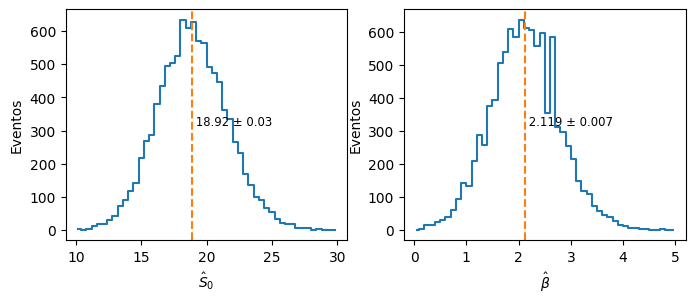

In [20]:
fig = plt.figure( figsize=(8,3) ) 
ax1, ax2 = fig.subplots(ncols=2)

# ax1
ax1.set_xlabel('$\hat{S}_0$')
ax1.set_ylabel('Eventos')
histo, borde_bin = np.histogram(S0_est, bins=50, range=[10, 30])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2 
ax1.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue')
ax1.axvline(media_S0, ls='--', color='tab:orange')
ax1.text(media_S0, 0.5, f' {media_S0:.2f} ± {sigma_S0_mean:.2f} ', transform=ax1.get_xaxis_transform(), fontsize="small")

# ax2
ax2.set_xlabel('$\hat{β}$')
ax2.set_ylabel('Eventos')
histo, borde_bin = np.histogram(beta_est, bins=50, range=[0, 5])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2 
ax2.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue')
ax2.axvline(media_beta, ls='--', color='tab:orange')
ax2.text(media_beta, 0.5, f' {media_beta:.3f} ± {sigma_beta_mean:.3f}', transform=ax2.get_xaxis_transform(), fontsize="small")

plt.show()

## Histogramas de los errores

In [21]:
error_S0

[2.6126090537593623,
 2.759813766374263,
 2.4592637000053577,
 2.7395400901589113,
 2.13337952298126,
 2.7525842105545775,
 2.6812605658972557,
 2.7505736751281384,
 2.804174051608101,
 2.6442212920936923,
 2.838137687166327,
 2.380660079419379,
 2.714557891011545,
 2.9168309070155503,
 2.721515748005184,
 2.4298734421956145,
 2.475596440193773,
 2.6236305756781464,
 3.033838436948649,
 2.692568960194108,
 2.755500331906658,
 2.698082140661155,
 2.6424201771014113,
 2.7665842170037047,
 2.401865036805717,
 2.4515713745351246,
 2.755419616594014,
 2.543578317303093,
 2.7615608416734934,
 2.4960855042365786,
 2.3820333138642704,
 2.600361680900664,
 2.6751267721233765,
 2.4845353741153167,
 2.458417103091721,
 2.406849617727014,
 2.37837133161651,
 2.719336839618525,
 2.494893327979606,
 2.7883901917724816,
 2.471297395734019,
 2.5136157316800594,
 2.726004538757484,
 2.7275310123130576,
 2.8118985976855213,
 2.656384934933142,
 2.8434550325731665,
 2.6605436909913345,
 2.659287164363864

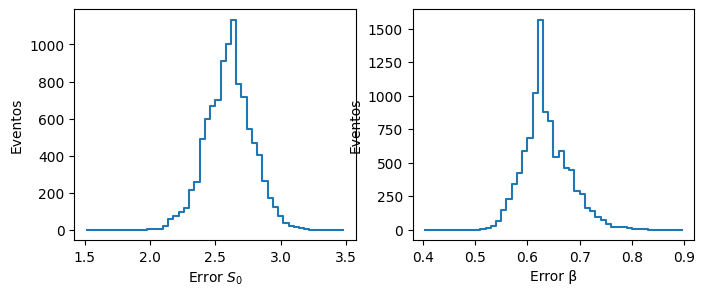

In [22]:
fig = plt.figure( figsize=(8,3) ) 
ax1, ax2 = fig.subplots(ncols=2)

# ax1
ax1.set_xlabel('Error $S_0$')
ax1.set_ylabel('Eventos')
histo, borde_bin = np.histogram(error_S0, bins=50, range=[1.5, 3.5])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2
ax1.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue')

#ax2
ax2.set_xlabel('Error β')
ax2.set_ylabel('Eventos')
histo, borde_bin = np.histogram(error_beta, bins=50, range=[0.4, 0.9])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2
ax2.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue')

plt.show()

## Cobertura de los intervalos de confianza

In [23]:
def cobertura(estimadores, errores, par):
    minimo = np.array(estimadores) - np.array(errores)
    maximo = np.array(estimadores) + np.array(errores)
    exitos = ((par-minimo)*(par-maximo)<0).sum()
    print(exitos)
    ndatos = len(estimadores)
    print(ndatos)
    cobertura = exitos/ndatos
    error_cobertura = math.sqrt(cobertura*(1-cobertura)/ndatos)
    return (cobertura, error_cobertura)

In [24]:
cobertura_S0, error_cobertura_S0 = cobertura(S0_est, error_S0, S0)
print(f'Cobertura intervalo S0: ({cobertura_S0*100:.1f} ± {error_cobertura_S0*100:.1f})%')

6749
10000
Cobertura intervalo S0: (67.5 ± 0.5)%


In [25]:
cobertura_beta, error_cobertura_beta = cobertura(beta_est, error_beta, beta)
print(f'Cobertura intervalo β: ({cobertura_beta*100:.1f} ± {error_cobertura_beta*100:.1f})%')

6825
10000
Cobertura intervalo β: (68.2 ± 0.5)%


## Bondad del ajuste

In [26]:
costo_min_obs = 0.32967858568717334
ndof = len(xdata) - len(theta)

Pvalor analítico

In [27]:
pvalor = chi2.sf(costo_min_obs, ndof)
print(f'χ²min = {costo_min_obs:.2f}')
print(f'ndof = {ndof}')
print(f'pvalor analítico = {pvalor*100:.1f}%')

χ²min = 0.33
ndof = 1
pvalor analítico = 56.6%


Pvalor numérico

In [28]:
ncola = np.sum(np.array(costo_min)>costo_min_obs)
print(ncola)
nsimulados = len(costo_min)
print(nsimulados)
pvalor = ncola / nsimulados
error_pvalor = math.sqrt(pvalor*(1-pvalor)/nsimulados)
print(f'pvalor numérico: ({pvalor*100:.1f} ± {error_pvalor*100:.1f})%')

5680
10000
pvalor numérico: (56.8 ± 0.5)%


## Gráficos bondad del ajuste

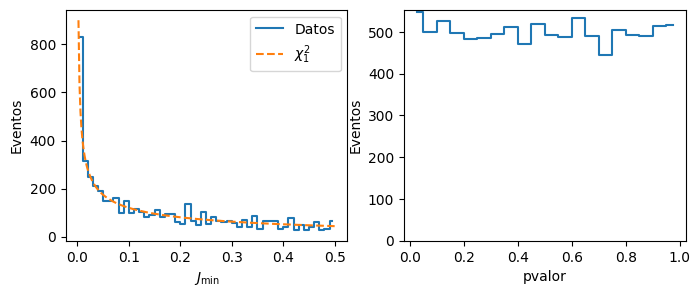

In [29]:
fig = plt.figure( figsize=(8,3) ) 
ax1, ax2 = fig.subplots(ncols=2)

# ax1
ax1.set_xlabel('$J_{\min}$')
ax1.set_ylabel('Eventos')
histo, borde_bin = np.histogram(costo_min, bins=50, range=[0, 0.5])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2
ax1.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue', label='Datos')
x = np.linspace(0, 0.5, 256)
bin_width = borde_bin[1] - borde_bin[0]
y = chi2.pdf(x, ndof) * nsimulaciones * bin_width 
ax1.plot(x, y, ls='--', color='tab:orange', label='$\chi^2_1$')
ax1.legend()

#ax2
ax2.set_xlabel('pvalor')
ax2.set_ylabel('Eventos')
pvalor = chi2.sf(costo_min, df=ndof)
histo, borde_bin = np.histogram(pvalor, bins=20, range=[0, 1])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2
ax2.plot(centro_bin, histo, drawstyle='steps-mid', color='tab:blue')
ax2.set_ylim(bottom=0)

plt.show()

In [30]:
pvalor

array([0.3261866 , 0.21607641, 0.27113034, ..., 0.45853616, 0.89826761,
       0.59195767])